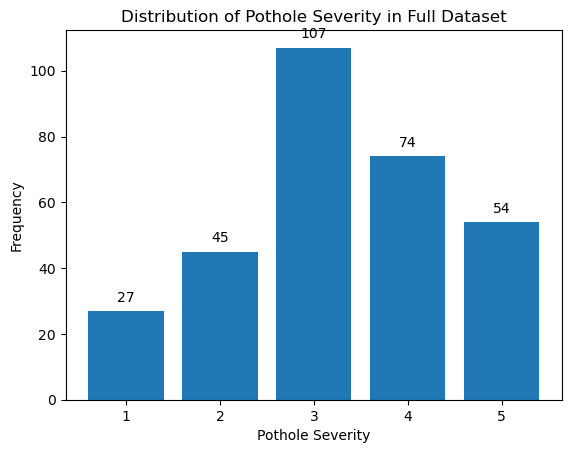

In [1]:
import matplotlib.pyplot as plt
x_axis = ['1', '2', '3', '4', '5']
y_axis = [27, 45, 107, 74, 54]

plt.bar(x_axis, y_axis)
plt.title('Distribution of Pothole Severity in Full Dataset')
for i, v in enumerate(y_axis):
    plt.text(i, v + 2, str(v), ha='center', va='bottom')
plt.xlabel('Pothole Severity')
plt.ylabel('Frequency')
plt.show()

In [6]:
import import_ipynb
# set the matplotlib backend so figures can be saved in the background
import matplotlib
matplotlib.use("Agg")
# import the necessary packages
import lenet
from sklearn.metrics import classification_report
from torch.utils.data import random_split
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
from torchvision import transforms
from torchvision.datasets import KMNIST
from torchvision.datasets import ImageFolder
from torch.optim import Adam
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import argparse
import torch
import time
import os
import shutil
import cv2 as cv
import random
# from lenet import Test

In [7]:
# define training hyperparameters
INIT_LR = 1e-3
BATCH_SIZE = 64
EPOCHS = 50
# define the train and val splits
TRAIN_SPLIT = 0.75
VAL_SPLIT = 1 - TRAIN_SPLIT
# set the device we will be using to train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [8]:
# load the KMNIST dataset
print("[INFO] loading the custom dataset...")
# trainData = KMNIST(root="data", train=True, download=True, transform=ToTensor())
# testData = KMNIST(root="data", train=False, download=True, transform=ToTensor())
transform = transforms.Compose([
    # resize
    transforms.Resize((400, 400)),
    # center-crop
    #transforms.CenterCrop(32),
    # to-tensor
    transforms.ToTensor(),
    # normalize
    #transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])
train_transforms = transforms.Compose([
    #transforms.RandomVerticalFlip(p=0.5),  # Randomly flip the input vertically with 50% probability
    #transforms.RandomHorizontalFlip(p=0.5),
    transforms.Resize((400, 400)), 
    transforms.ToTensor(),
])
#os.mkdir("C:\\Users\\sbhat\\Documents\\GitHub\\pothole-severity\\project\\train-data")
#os.mkdir("C:\\Users\\sbhat\\Documents\\GitHub\\pothole-severity\\project\\val-data")
#os.mkdir("C:\\Users\\sbhat\\Documents\\GitHub\\pothole-severity\\project\\test-data")
'''for i in range(1, 6):
    os.mkdir("C:\\Users\\sbhat\\Documents\\GitHub\\pothole-severity\\project\\train-data" + "\\" + str(i))
    os.mkdir("C:\\Users\\sbhat\\Documents\\GitHub\\pothole-severity\\project\\val-data" + "\\" + str(i))
    os.mkdir("C:\\Users\\sbhat\\Documents\\GitHub\\pothole-severity\\project\\test-data" + "\\" + str(i))'''
    
for i in range(1, 6):
    path = "C:\\Users\\sbhat\\Documents\\GitHub\\pothole-severity\\project\\images" + "\\" + str(i)
    paths = os.listdir(path)
    index_list = list(range(len(paths)))
    random.shuffle(index_list)
    for j in range(int(0.8*len(index_list))):
        shutil.move(path + "\\" + paths[index_list[j]], "C:\\Users\\sbhat\\Documents\\GitHub\\pothole-severity\\project\\train-data" + "\\" + str(i) + "\\" + paths[index_list[j]])
    for j in range(int(0.8*len(index_list)), int(0.9*len(index_list))):
        shutil.move(path + "\\" + paths[index_list[j]], "C:\\Users\\sbhat\\Documents\\GitHub\\pothole-severity\\project\\val-data" + "\\" + str(i) + "\\" + paths[index_list[j]])
    for j in range(int(0.9*len(index_list)), len(index_list)):
        shutil.move(path + "\\" + paths[index_list[j]], "C:\\Users\\sbhat\\Documents\\GitHub\\pothole-severity\\project\\test-data" + "\\" + str(i) + "\\" + paths[index_list[j]])
trainDataset = ImageFolder("C:\\Users\\sbhat\\Documents\\GitHub\\pothole-severity\\project\\train-data", train_transforms)
valDataset = ImageFolder("C:\\Users\\sbhat\\Documents\\GitHub\\pothole-severity\\project\\val-data", transform)
testDataset = ImageFolder("C:\\Users\\sbhat\\Documents\\GitHub\\pothole-severity\\project\\test-data", transform)
    
# print(len(dataset))
#print(len(testDataset))
'''
trainData, valData, testData = random_split(dataset, [245, 31, 31])
# calculate the train/validation split
print("[INFO] generating the train/validation split...")
numTrainSamples = round(len(trainData) * TRAIN_SPLIT)
numValSamples = round(len(trainData) * VAL_SPLIT)
(trainData, valData) = random_split(trainData,
	[numTrainSamples, numValSamples],
	generator=torch.Generator().manual_seed(42))
train_data_transformed = train_transforms(trainData)
'''

[INFO] loading the custom dataset...


'\ntrainData, valData, testData = random_split(dataset, [245, 31, 31])\n# calculate the train/validation split\nprint("[INFO] generating the train/validation split...")\nnumTrainSamples = round(len(trainData) * TRAIN_SPLIT)\nnumValSamples = round(len(trainData) * VAL_SPLIT)\n(trainData, valData) = random_split(trainData,\n\t[numTrainSamples, numValSamples],\n\tgenerator=torch.Generator().manual_seed(42))\ntrain_data_transformed = train_transforms(trainData)\n'

In [9]:
# initialize the train, validation, and test data loaders
trainDataLoader = DataLoader(trainDataset, shuffle=True,
	batch_size=BATCH_SIZE)
valDataLoader = DataLoader(valDataset, batch_size=BATCH_SIZE)
testDataLoader = DataLoader(testDataset, batch_size=BATCH_SIZE)
# calculate steps per epoch for training and validation set
trainSteps = len(trainDataLoader.dataset) // BATCH_SIZE
valSteps = len(valDataLoader.dataset) // BATCH_SIZE

In [10]:
# initialize the LeNet model
print("[INFO] initializing the LeNet model...")
model = lenet.LeNet(
	numChannels=3,
	classes=5).to(device)
    #len(trainData.dataset.classes)
# initialize our optimizer and loss function
opt = Adam(model.parameters(), lr=INIT_LR)
lossFn = nn.NLLLoss()
# initialize a dictionary to store training history
H = {
	"train_loss": [],
	"train_acc": [],
	"val_loss": [],
	"val_acc": []
}
# measure how long training is going to take
print("[INFO] training the network...")
startTime = time.time()

[INFO] initializing the LeNet model...
[INFO] training the network...


In [11]:
# loop over our epochs
for e in range(0, EPOCHS):
	# set the model in training mode
	model.train()
	# initialize the total training and validation loss
	totalTrainLoss = 0
	totalValLoss = 0
	# initialize the number of correct predictions in the training
	# and validation step
	trainCorrect = 0
	valCorrect = 0
	# loop over the training set
	for (x, y) in trainDataLoader:
		# send the input to the device
		(x, y) = (x.to(device), y.to(device))
		# perform a forward pass and calculate the training loss
		pred = model(x)
		loss = lossFn(pred, y)
		# zero out the gradients, perform the backpropagation step,
		# and update the weights
		opt.zero_grad()
		loss.backward()
		opt.step()
		# add the loss to the total training loss so far and
		# calculate the number of correct predictions
		totalTrainLoss += loss
		trainCorrect += (pred.argmax(1) == y).type(
			torch.float).sum().item()

	# switch off autograd for evaluation
	with torch.no_grad():
		# set the model in evaluation mode
		model.eval()
		# loop over the validation set
		for (x, y) in valDataLoader:
			# send the input to the device
			(x, y) = (x.to(device), y.to(device))
			# make the predictions and calculate the validation loss
			pred = model(x)
			totalValLoss += lossFn(pred, y)
			# calculate the number of correct predictions
			valCorrect += (pred.argmax(1) == y).type(
				torch.float).sum().item()

	# calculate the average training and validation loss
	avgTrainLoss = totalTrainLoss / trainSteps
	avgValLoss = totalValLoss / valSteps
	# calculate the training and validation accuracy
	trainCorrect = trainCorrect / len(trainDataLoader.dataset)
	valCorrect = valCorrect / len(valDataLoader.dataset)
	# update our training history
	H["train_loss"].append(avgTrainLoss.cpu().detach().numpy())
	H["train_acc"].append(trainCorrect)
	H["val_loss"].append(avgValLoss.cpu().detach().numpy())
	H["val_acc"].append(valCorrect)
	# print the model training and validation information
	print("[INFO] EPOCH: {}/{}".format(e + 1, EPOCHS))
	print("Train loss: {:.6f}, Train accuracy: {:.4f}".format(
		avgTrainLoss, trainCorrect))
	print("Val loss: {:.6f}, Val accuracy: {:.4f}\n".format(
		avgValLoss, valCorrect))

torch.Size([64, 20, 396, 396])
torch.Size([64, 20, 396, 396])
torch.Size([64, 20, 396, 396])
torch.Size([52, 20, 396, 396])
torch.Size([30, 20, 396, 396])
[INFO] EPOCH: 1/50
Train loss: 40.670254, Train accuracy: 0.2049
Val loss: inf, Val accuracy: 0.1333

torch.Size([64, 20, 396, 396])
torch.Size([64, 20, 396, 396])
torch.Size([64, 20, 396, 396])
torch.Size([52, 20, 396, 396])
torch.Size([30, 20, 396, 396])
[INFO] EPOCH: 2/50
Train loss: 4.484495, Train accuracy: 0.2336
Val loss: inf, Val accuracy: 0.3667

torch.Size([64, 20, 396, 396])
torch.Size([64, 20, 396, 396])
torch.Size([64, 20, 396, 396])
torch.Size([52, 20, 396, 396])
torch.Size([30, 20, 396, 396])
[INFO] EPOCH: 3/50
Train loss: 1.936662, Train accuracy: 0.4344
Val loss: inf, Val accuracy: 0.5667

torch.Size([64, 20, 396, 396])
torch.Size([64, 20, 396, 396])
torch.Size([64, 20, 396, 396])
torch.Size([52, 20, 396, 396])
torch.Size([30, 20, 396, 396])
[INFO] EPOCH: 4/50
Train loss: 1.272488, Train accuracy: 0.6107
Val loss: in

torch.Size([64, 20, 396, 396])
torch.Size([64, 20, 396, 396])
torch.Size([64, 20, 396, 396])
torch.Size([52, 20, 396, 396])
torch.Size([30, 20, 396, 396])
[INFO] EPOCH: 33/50
Train loss: 0.000188, Train accuracy: 1.0000
Val loss: inf, Val accuracy: 0.5667

torch.Size([64, 20, 396, 396])
torch.Size([64, 20, 396, 396])
torch.Size([64, 20, 396, 396])
torch.Size([52, 20, 396, 396])
torch.Size([30, 20, 396, 396])
[INFO] EPOCH: 34/50
Train loss: 0.000167, Train accuracy: 1.0000
Val loss: inf, Val accuracy: 0.5667

torch.Size([64, 20, 396, 396])
torch.Size([64, 20, 396, 396])
torch.Size([64, 20, 396, 396])
torch.Size([52, 20, 396, 396])
torch.Size([30, 20, 396, 396])
[INFO] EPOCH: 35/50
Train loss: 0.000144, Train accuracy: 1.0000
Val loss: inf, Val accuracy: 0.5667

torch.Size([64, 20, 396, 396])
torch.Size([64, 20, 396, 396])
torch.Size([64, 20, 396, 396])
torch.Size([52, 20, 396, 396])
torch.Size([30, 20, 396, 396])
[INFO] EPOCH: 36/50
Train loss: 0.000131, Train accuracy: 1.0000
Val loss:

In [12]:
# finish measuring how long training took
endTime = time.time()
print("[INFO] total time taken to train the model: {:.2f}s".format(
	endTime - startTime))
# we can now evaluate the network on the test set
print("[INFO] evaluating network...")
# turn off autograd for testing evaluation
#print(len(trainDataLoader))
#print(len(valDataLoader))
#print(len(testDataLoader))
with torch.no_grad():
	# set the model in evaluation mode
	model.eval()
	
	# initialize a list to store our predictions
	#preds = []
	# loop over the test set
	for (x, y) in testDataLoader:
		preds = []        
		# send the input to the device
		x = x.to(device)
		# make the predictions and add them to the list
		pred = model(x)
#		print(pred)
		preds.extend(pred.argmax(axis=1).cpu().numpy())
#		print(preds)
#		print(y)
		confusionMatrix = np.zeros((5, 5))
		#print(confusionMatrix)
		counter = 0     
		correct = 0        
		for tv in y:
			#print(counter)
			#print(tv.item())
			prediction = preds[counter]
			#print("prediction is " + str(prediction))
			#print("true value is " + str(tv.item()))
			confusionMatrix[prediction][tv.item()] += 1
			if prediction == tv.item():
				correct += 1
			counter += 1
print("Test Accuracy: " + str(correct/counter))
print(confusionMatrix)
'''
			if prediction == 0 and tv.item() == 0:
				confusionMatrix[0][0] += 1
				print("adding a correct guess to category 1")                
			elif prediction == 0 and tv.item() != 0:
				confusionMatrix[0][1] += 1
				print("adding a incorrect guess to category 1")  
			elif prediction == 1 and tv.item() == 1:
				confusionMatrix[1][0] += 1
				print("adding a correct guess to category 2")  
			elif prediction == 1 and tv.item() != 1:
				confusionMatrix[1][1] += 1
				print("adding a incorrect guess to category 2")  
			elif prediction == 2 and tv.item() == 2:
				confusionMatrix[2][0] += 1
				print("adding a correct guess to category 3")  
			elif prediction == 2 and tv.item() != 2:
				confusionMatrix[2][1] += 1
				print("adding a incorrect guess to category 3")  
			elif prediction == 3 and tv.item() == 3:
				confusionMatrix[3][0] += 1
				print("adding a correct guess to category 4")  
			elif prediction == 3 and tv.item() != 3:
				confusionMatrix[3][1] += 1
				print("adding a incorrect guess to category 4")  
			elif prediction == 4 and tv.item() == 4:
				confusionMatrix[4][0] += 1
				print("adding a correct guess to category 5")  
			elif prediction == 4 and tv.item() != 4:
				confusionMatrix[4][1] += 1
				print("adding a incorrect guess to category 5")  
'''
# generate a classification report
# print(classification_report(testData.targets.cpu().numpy(),
#	np.array(preds), target_names=testData.classes))

[INFO] total time taken to train the model: 1239.81s
[INFO] evaluating network...
torch.Size([33, 20, 396, 396])
Test Accuracy: 0.5151515151515151
[[1. 1. 0. 0. 0.]
 [2. 4. 1. 1. 1.]
 [0. 0. 8. 3. 1.]
 [0. 0. 1. 2. 2.]
 [0. 0. 1. 2. 2.]]


'\n\t\t\tif prediction == 0 and tv.item() == 0:\n\t\t\t\tconfusionMatrix[0][0] += 1\n\t\t\t\tprint("adding a correct guess to category 1")                \n\t\t\telif prediction == 0 and tv.item() != 0:\n\t\t\t\tconfusionMatrix[0][1] += 1\n\t\t\t\tprint("adding a incorrect guess to category 1")  \n\t\t\telif prediction == 1 and tv.item() == 1:\n\t\t\t\tconfusionMatrix[1][0] += 1\n\t\t\t\tprint("adding a correct guess to category 2")  \n\t\t\telif prediction == 1 and tv.item() != 1:\n\t\t\t\tconfusionMatrix[1][1] += 1\n\t\t\t\tprint("adding a incorrect guess to category 2")  \n\t\t\telif prediction == 2 and tv.item() == 2:\n\t\t\t\tconfusionMatrix[2][0] += 1\n\t\t\t\tprint("adding a correct guess to category 3")  \n\t\t\telif prediction == 2 and tv.item() != 2:\n\t\t\t\tconfusionMatrix[2][1] += 1\n\t\t\t\tprint("adding a incorrect guess to category 3")  \n\t\t\telif prediction == 3 and tv.item() == 3:\n\t\t\t\tconfusionMatrix[3][0] += 1\n\t\t\t\tprint("adding a correct guess to category

In [53]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(H["train_loss"], label="train_loss")
plt.plot(H["val_loss"], label="val_loss")
plt.title("Training Loss on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.savefig("loss.jpg")
plt.style.use("ggplot")
plt.figure()
plt.plot(H["train_acc"], label="train_acc")
plt.plot(H["val_acc"], label="val_acc")
plt.title("Training Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")
plt.savefig("accuracy.jpg")
# serialize the model to disk
torch.save(model, "model.h5")